<a href="https://colab.research.google.com/github/Eieiz007/Machine-learning/blob/main/Imbalance_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API kaggle

In [1]:
# !pip install kaggle
import os
import shutil
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nantakornnacamanurak","key":"0b6746bac2bd1c810007d50b5b1540a4"}'}

In [5]:
# สร้างโฟลเดอร์ .kaggle และย้ายไฟล์ไป
os.makedirs("kaggle", exist_ok=True)
shutil.move("kaggle.json", "kaggle/")

Error: Destination path 'kaggle/kaggle.json' already exists

In [6]:
os.chmod("kaggle/kaggle.json", 600)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/imbalanced-data-practice")

# Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Merge data

In [4]:
# โหลดข้อมูล
train = "/root/.cache/kagglehub/datasets/arashnic/imbalanced-data-practice/versions/4/aug_train.csv"
test = "/root/.cache/kagglehub/datasets/arashnic/imbalanced-data-practice/versions/4/aug_test.csv"
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

In [5]:
df_train.shape , df_test.shape

((382154, 12), (78273, 11))

In [6]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [7]:
le = LabelEncoder()

df_train['Gender'] = le.fit_transform(df_train['Gender'])
df_train['Vehicle_Age'] = le.fit_transform(df_train['Vehicle_Age'])
df_train['Vehicle_Damage'] = le.fit_transform(df_train['Vehicle_Damage'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Vehicle_Age'] = le.fit_transform(df_test['Vehicle_Age'])
df_test['Vehicle_Damage'] = le.fit_transform(df_test['Vehicle_Damage'])

df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


# Data Imbalance check

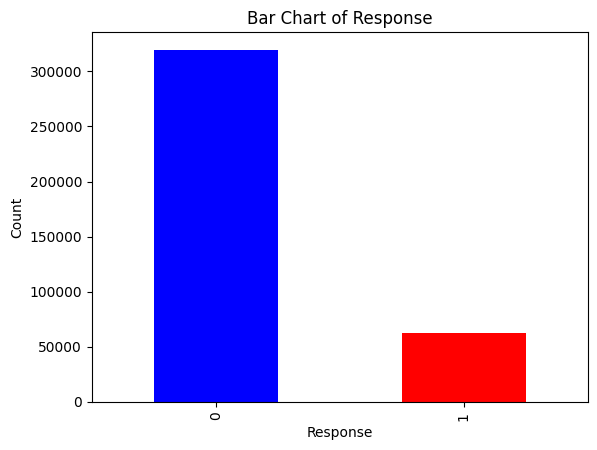

In [8]:
df_train['Response'].value_counts().plot(kind='bar', color=['blue','red'])  # เปลี่ยนเป็นสีฟ้า
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Bar Chart of Response')
plt.show()


In [9]:
df_train[df_train['Response'] == 0].duplicated().sum()

0

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# แยก Features และ Target
X = df_train.drop(columns=['Response'])  # Features
y = df_train['Response']  # Target

# สร้างตัวอย่างเพิ่มด้วย SMOTE (ค่า default)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# สร้าง DataFrame ใหม่
df_train_resampled = X_resampled.copy()
df_train_resampled['Response'] = y_resampled

# เช็คสัดส่วนข้อมูลใหม่
print("Before:", Counter(y))  # ก่อน Oversampling
print("After:", Counter(y_resampled))  # หลัง Oversampling

Before: Counter({0: 319553, 1: 62601})
After: Counter({0: 319553, 1: 319553})


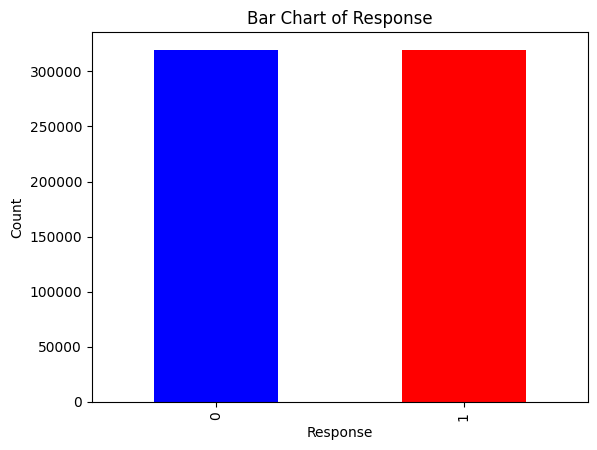

In [11]:
df_train_resampled['Response'].value_counts().plot(kind='bar', color=['blue','red'])  # เปลี่ยนเป็นสีฟ้า
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Bar Chart of Response')
plt.show()


In [12]:
df_test["Response"] = -1
df_combined = pd.concat([df_train_resampled, df_test], ignore_index=True)
df_combined

# df_train_cleaned = df_combined[df_combined["Response"] != -1]  # ดึง train กลับมา
# df_test_cleaned = df_combined[df_combined["Response"] == -1].drop(columns=["Response"])  # ลบ target ออก


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
717374,847,1,43,1,39.0,0,0,1,2630.0,124.0,26,-1
717375,417524,0,21,1,12.0,1,1,0,32937.0,152.0,185,-1
717376,188087,1,48,1,29.0,1,0,0,35247.0,124.0,101,-1
717377,215680,1,64,1,5.0,1,0,0,25705.0,26.0,86,-1


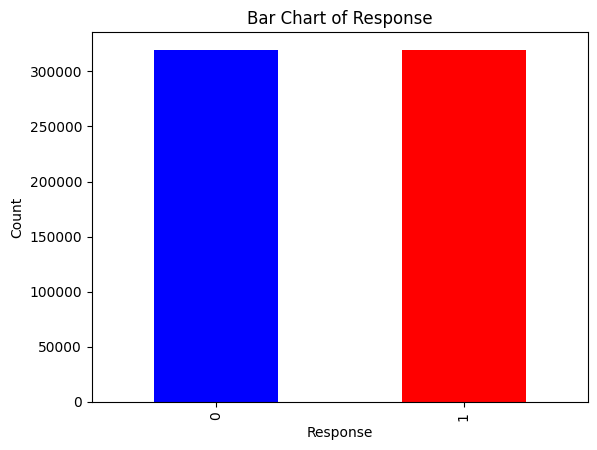

In [13]:
df_combined['Response'][df_combined['Response'] != -1].value_counts().plot(kind='bar', color=['blue','red'])  # เปลี่ยนเป็นสีฟ้า
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Bar Chart of Response')
plt.show()


# Data  preprocessing

# 1.drop_duplicates

In [14]:
# 1️⃣ ลบข้อมูลซ้ำ
df_combined = df_combined.drop_duplicates()

# 2️⃣ ตรวจสอบค่า Missing
missing_values = df_combined.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [15]:
df_combined = df_combined.fillna(method='ffill')  # ใช้วิธีเติมค่าจากแถวก่อนหน้า (Forward Fill)
# df_combined = df_combined.dropna()  # หรือ ลบแถวที่มี Missing (ถ้าข้อมูลไม่สำคัญ)

df_combined.describe().T

<ipython-input-15-a5a42585ca21>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_combined = df_combined.fillna(method='ffill')  # ใช้วิธีเติมค่าจากแถวก่อนหน้า (Forward Fill)


,count,mean,std,min,25%,50%,75%,max
id,717369.0,253175.942732,146628.551328,1.0,126285.000000,253068.0,379567.0,508145.0
Gender,717369.0,0.480495,0.499620,0.0,0.000000,0.0,1.0,1.0
Age,717369.0,40.002568,13.441612,20.0,28.000000,40.0,48.0,85.0
Driving_License,717369.0,0.998299,0.041204,0.0,1.000000,1.0,1.0,1.0
Region_Code,717369.0,26.531590,11.941975,0.0,18.000000,28.0,33.0,52.0
Previously_Insured,717369.0,0.313942,0.464093,0.0,0.000000,0.0,1.0,1.0
Vehicle_Age,717369.0,0.382608,0.545721,0.0,0.000000,0.0,1.0,2.0
Vehicle_Damage,717369.0,0.657649,0.474497,0.0,0.000000,1.0,1.0,1.0
Annual_Premium,717369.0,31137.127440,17362.372351,2630.0,24799.151156,32245.0,40226.0,540165.0
Policy_Sales_Channel,717369.0,103.907231,52.855229,1.0,35.073063,124.0,152.0,163.0


In [16]:
df_combined = df_combined.drop(columns=['id','Gender','Driving_License'])
df_combined.head()

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,22,7.0,1,1,0,2630.0,152.0,16,0
1,42,28.0,0,0,1,43327.0,26.0,135,0
2,66,33.0,0,0,1,35841.0,124.0,253,0
3,22,33.0,0,1,0,27645.0,152.0,69,0
4,28,46.0,1,1,0,29023.0,152.0,211,0


In [17]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717369 entries, 0 to 717378
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   717369 non-null  int64  
 1   Region_Code           717369 non-null  float64
 2   Previously_Insured    717369 non-null  int64  
 3   Vehicle_Age           717369 non-null  int64  
 4   Vehicle_Damage        717369 non-null  int64  
 5   Annual_Premium        717369 non-null  float64
 6   Policy_Sales_Channel  717369 non-null  float64
 7   Vintage               717369 non-null  int64  
 8   Response              717369 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 54.7 MB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Previously_Insured'}>],
       [<Axes: title={'center': 'Vehicle_Age'}>,
        <Axes: title={'center': 'Vehicle_Damage'}>,
        <Axes: title={'center': 'Annual_Premium'}>],
       [<Axes: title={'center': 'Policy_Sales_Channel'}>,
        <Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

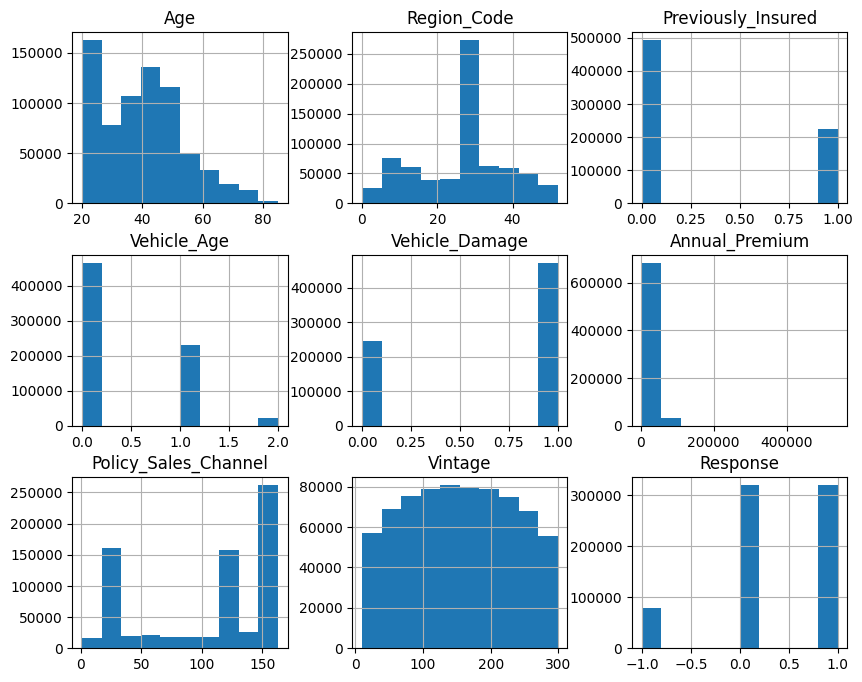

In [18]:
df_combined.hist(figsize=(10,8))

# Feature engineering

In [19]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717369 entries, 0 to 717378
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   717369 non-null  int64  
 1   Region_Code           717369 non-null  float64
 2   Previously_Insured    717369 non-null  int64  
 3   Vehicle_Age           717369 non-null  int64  
 4   Vehicle_Damage        717369 non-null  int64  
 5   Annual_Premium        717369 non-null  float64
 6   Policy_Sales_Channel  717369 non-null  float64
 7   Vintage               717369 non-null  int64  
 8   Response              717369 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 54.7 MB


In [20]:
df_combined = pd.get_dummies(df_combined, columns=['Previously_Insured', 'Vehicle_Damage'], drop_first=True)
df_combined

,Age,Region_Code,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Previously_Insured_1,Vehicle_Damage_1
0,22,7.0,1,2630.0,152.0,16,0,True,False
1,42,28.0,0,43327.0,26.0,135,0,False,True
2,66,33.0,0,35841.0,124.0,253,0,False,True
3,22,33.0,1,27645.0,152.0,69,0,False,False
4,28,46.0,1,29023.0,152.0,211,0,True,False
...,...,...,...,...,...,...,...,...,...
717374,43,39.0,0,2630.0,124.0,26,-1,False,True
717375,21,12.0,1,32937.0,152.0,185,-1,True,False
717376,48,29.0,0,35247.0,124.0,101,-1,True,False
717377,64,5.0,0,25705.0,26.0,86,-1,True,False


# Data splitting

In [21]:
df_train_cleaned = df_combined[df_combined["Response"] != -1]  # ดึง train กลับมา
df_test_cleaned = df_combined[df_combined["Response"] == -1].drop(columns=["Response"])  # ลบ target ออก

In [22]:
df_train_cleaned

,Age,Region_Code,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Previously_Insured_1,Vehicle_Damage_1
0,22,7.000000,1,2630.000000,152.000000,16,0,True,False
1,42,28.000000,0,43327.000000,26.000000,135,0,False,True
2,66,33.000000,0,35841.000000,124.000000,253,0,False,True
3,22,33.000000,1,27645.000000,152.000000,69,0,False,False
4,28,46.000000,1,29023.000000,152.000000,211,0,True,False
...,...,...,...,...,...,...,...,...,...
639101,45,28.000000,0,33881.607111,56.706218,73,1,False,True
639102,46,29.366430,0,47102.084830,116.560549,207,1,False,True
639103,45,34.915181,0,36577.897519,114.425134,227,1,False,True
639104,66,32.850936,1,40615.069129,26.000000,137,1,False,True


In [23]:
df_test_cleaned

,Age,Region_Code,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Previously_Insured_1,Vehicle_Damage_1
639106,34,39.0,0,38244.0,124.0,146,True,False
639107,55,28.0,2,37577.0,122.0,109,False,True
639108,39,28.0,0,24578.0,26.0,63,True,False
639109,28,50.0,0,40507.0,8.0,129,True,False
639110,24,10.0,1,36783.0,152.0,201,False,True
...,...,...,...,...,...,...,...,...
717374,43,39.0,0,2630.0,124.0,26,False,True
717375,21,12.0,1,32937.0,152.0,185,True,False
717376,48,29.0,0,35247.0,124.0,101,True,False
717377,64,5.0,0,25705.0,26.0,86,True,False


In [24]:
from sklearn.model_selection import train_test_split

X = df_train_cleaned.drop(columns=['Response'])  # Features
y = df_train_cleaned['Response']  # Target

# แบ่ง Train / Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# เช็คขนาดข้อมูล
print("Train size:", X_train.shape, y_train.shape)
print("Validation size:", X_val.shape, y_val.shape)


Train size: (511276, 8) (511276,)
Validation size: (127820, 8) (127820,)


# Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

# สร้างตัวแปร StandardScaler
scaler = StandardScaler()

# Fit-transform กับ X_train และ Transform X_val, X_test
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(df_test_cleaned.drop(columns=['Response'], errors='ignore'))  # ถ้ามี Response ให้ drop

# แปลงกลับเป็น DataFrame (ถ้าต้องการ)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=df_test_cleaned.drop(columns=['Response'], errors='ignore').columns)

print("✅ Standardization Done!")

✅ Standardization Done!


In [26]:
X_train_scaled

,Age,Region_Code,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Previously_Insured_1,Vehicle_Damage_1
0,1.426801,0.701784,-0.678476,-0.499120,-1.461809,0.373125,-0.642955,0.687307
1,0.441233,0.121929,-0.678476,0.453827,-0.727096,-0.253064,-0.642955,0.687307
2,0.137981,0.121929,-0.678476,0.519024,0.393561,-0.380858,-0.642955,0.687307
3,0.441233,-0.962635,-0.678476,-1.644859,-1.088065,-1.467104,-0.642955,0.687307
4,-0.165270,-0.641242,-0.678476,-0.089473,0.401238,0.232552,-0.642955,0.687307
...,...,...,...,...,...,...,...,...
511271,-0.013644,-0.682470,-0.678476,0.063247,0.401238,-0.061373,-0.642955,0.687307
511272,0.137981,0.121929,-0.678476,0.160731,-1.461809,0.948197,-0.642955,0.687307
511273,0.744485,0.774486,-0.678476,-0.150576,-0.360255,0.066420,-0.642955,0.687307
511274,1.654240,-1.066632,-0.678476,0.480368,-1.461809,0.769286,1.555318,0.687307


# Model

In [27]:
# !pip install lazypredict

In [28]:
# from lazypredict.Supervised import LazyClassifier

# # ใช้ LazyPredict เทรนทุกโมเดลให้เลย
# clf = LazyClassifier()
# models, predictions = clf.fit(X_train_scaled, X_val_scaled, y_train, y_val)

# # ดูผลลัพธ์
# print(models)

In [34]:
import seaborn as sns


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_val_scaled)
y_prob = knn.predict_proba(X_val_scaled)

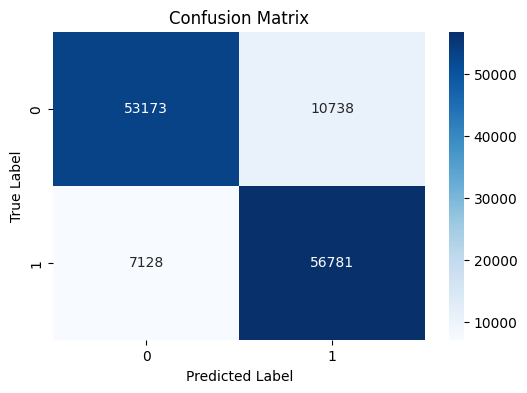

In [36]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# พล็อต Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.83      0.86     63911
           1       0.84      0.89      0.86     63909

    accuracy                           0.86    127820
   macro avg       0.86      0.86      0.86    127820
weighted avg       0.86      0.86      0.86    127820



# Xgboost


In [38]:
pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:53:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


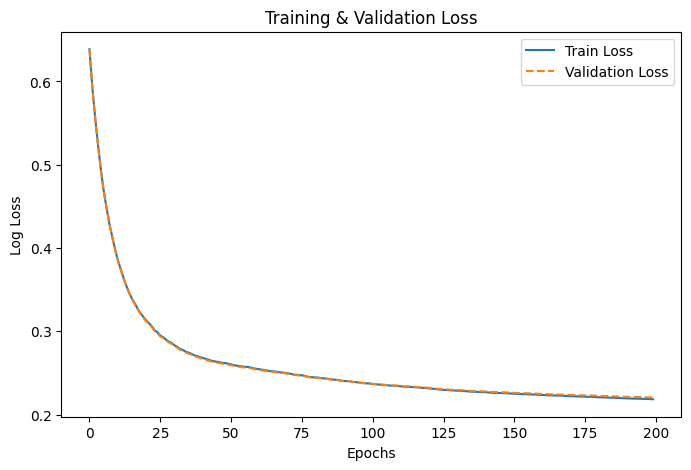

In [50]:
import xgboost as xgb
from sklearn.metrics import log_loss, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# สร้างโมเดล XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # ใช้ softmax สำหรับ multi-class classification
    eval_metric='logloss',        # ใช้ Cross Entropy Loss (log loss)
    use_label_encoder=False,
    n_jobs=-1,
    tree_method='hist',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200 ,
    scale_pos_weight=1
)

# เทรนโมเดลพร้อมเก็บ Train Loss และ Validation Loss
eval_set = [(X_train_scaled, y_train), (X_val_scaled, y_val)]
xgb_model.fit(X_train_scaled, y_train, eval_set=eval_set, verbose=False)

# ดึงค่าการสูญเสีย (loss) ของ train และ val
results = xgb_model.evals_result()
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

# พล็อตกราฟ Train Loss และ Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


In [53]:
loss = log_loss(y_val, y_prob)
print(f'Cross Entropy Loss: {loss:.4f}')

Cross Entropy Loss: 0.2206


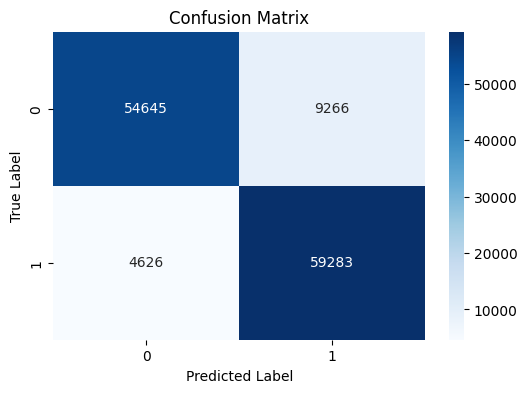

In [54]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# พล็อต Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter tuning

In [56]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00


In [59]:
import optuna
import xgboost as xgb
from sklearn.metrics import log_loss

# ฟังก์ชัน Objective สำหรับ Optuna
def objective(trial):
    params = {
        'objective': 'binary:logistic',   # ใช้ Binary Classification
        'eval_metric': 'logloss',         # Cross Entropy Loss
        'use_label_encoder': False,
        'tree_method': 'hist',            # เร่งความเร็ว
        'n_jobs': -1,                     # ใช้ทุก CPU core
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 1e-3, 10, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10, log=True)
    }

    # สร้างและเทรนโมเดล XGBoost
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_val_scaled, y_val)], verbose=False)

    # ทำนายค่า Log Loss
    y_prob = xgb_model.predict_proba(X_val_scaled)
    return log_loss(y_val, y_prob)

# เริ่มจูน Hyperparameter
study = optuna.create_study(direction='minimize')  # หา log_loss ต่ำสุด
study.optimize(objective, n_trials=5)  # ลอง 30 รอบ


[I 2025-03-03 08:00:02,449] A new study created in memory with name: no-name-f6c99ee7-3db6-4952-b8c7-354a14751354
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:00:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-03 08:00:53,573] Trial 0 finished with value: 0.22023633819501032 and parameters: {'max_depth': 10, 'learning_rate': 0.022930687793599382, 'n_estimators': 423, 'subsample': 0.5039185748527314, 'colsample_bytree': 0.6270563162214161, 'gamma': 0.7434227403290861, 'lambda': 0.009639272383110771, 'alpha': 0.15731627763152403}. Best is trial 0 with value: 0.22023633819501032.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:00:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-03 08:01:19,414] Trial 1 finished with value: 0.24577537931784466 

In [60]:
# ใช้ค่าที่ดีที่สุดจาก Optuna
best_params = study.best_params

# เทรนโมเดล XGBoost
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train_scaled, y_train)

# ทำนายผล
y_pred = xgb_model.predict(X_val_scaled)
y_prob = xgb_model.predict_proba(X_val_scaled)

# คำนวณ Log Loss
loss = log_loss(y_val, y_prob)
print(f'Cross Entropy Loss: {loss:.4f}')

Cross Entropy Loss: 0.2202


In [63]:
best_params

{'max_depth': 10,
 'learning_rate': 0.022930687793599382,
 'n_estimators': 423,
 'subsample': 0.5039185748527314,
 'colsample_bytree': 0.6270563162214161,
 'gamma': 0.7434227403290861,
 'lambda': 0.009639272383110771,
 'alpha': 0.15731627763152403}

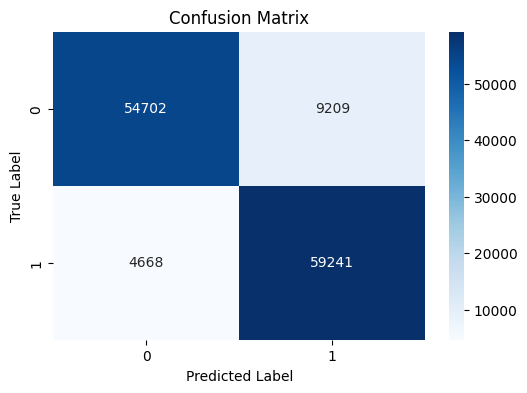

In [61]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

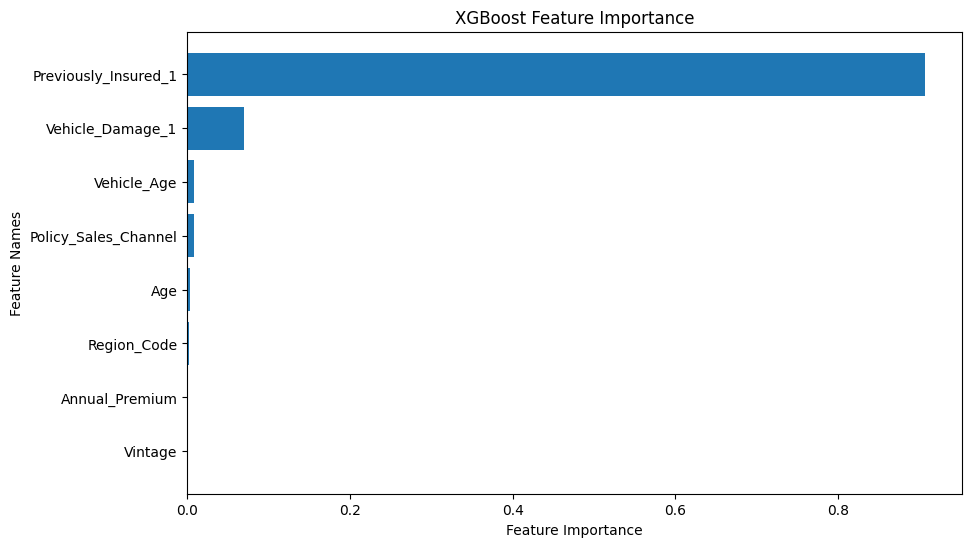

In [62]:

# ดึงค่าความสำคัญของฟีเจอร์
feature_importance = xgb_model.feature_importances_

# สร้าง DataFrame สำหรับจัดเรียงค่า
feature_names = X_train_scaled.columns  # ชื่อฟีเจอร์
sorted_idx = np.argsort(feature_importance)  # เรียงค่าจากน้อยไปมาก

# วาดกราฟ
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("XGBoost Feature Importance")
plt.show()

# Eva

In [65]:
X_train_scaled.columns

Index(['Age', 'Region_Code', 'Vehicle_Age', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Previously_Insured_1',
       'Vehicle_Damage_1'],
      dtype='object')

In [70]:
X_train_scaled.drop(columns=['Age','Region_Code'])

,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Previously_Insured_1,Vehicle_Damage_1
0,-0.678476,-0.499120,-1.461809,0.373125,-0.642955,0.687307
1,-0.678476,0.453827,-0.727096,-0.253064,-0.642955,0.687307
2,-0.678476,0.519024,0.393561,-0.380858,-0.642955,0.687307
3,-0.678476,-1.644859,-1.088065,-1.467104,-0.642955,0.687307
4,-0.678476,-0.089473,0.401238,0.232552,-0.642955,0.687307
...,...,...,...,...,...,...
511271,-0.678476,0.063247,0.401238,-0.061373,-0.642955,0.687307
511272,-0.678476,0.160731,-1.461809,0.948197,-0.642955,0.687307
511273,-0.678476,-0.150576,-0.360255,0.066420,-0.642955,0.687307
511274,-0.678476,0.480368,-1.461809,0.769286,1.555318,0.687307


In [71]:
# เทรนโมเดล XGBoost
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train_scaled.drop(columns=['Age','Region_Code']), y_train)

# ทำนายผล
y_pred = xgb_model.predict(X_val_scaled.drop(columns=['Age','Region_Code']))
y_prob = xgb_model.predict_proba(X_val_scaled.drop(columns=['Age','Region_Code']))

# คำนวณ Log Loss
loss = log_loss(y_val, y_prob)
print(f'Cross Entropy Loss: {loss:.4f}')

Cross Entropy Loss: 0.2773


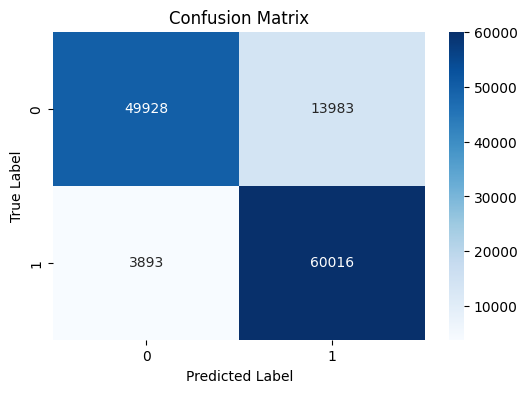

In [72]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()